In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('kangaroo.csv')
df

,X,Y
0,609,241
1,629,222
2,620,233
3,564,207
4,645,247
5,493,189
6,606,226
7,660,240
8,630,215
9,672,231


In [ ]:
X = df[['X']]
y = df[['Y']]

In [ ]:
def grad_descent(X, y, alpha, epsilon):
  iteration = [0]
  i = 0
  m = np.shape(X)[0] # Total number of samples

  # Initialize the parameters
  Theta = np.ones(shape=(len(df.columns),1))

  # Compute the initial cost
  cost = [np.transpose(X@Theta-y)@(X@Theta-y)]
  delta = 1

  while(delta>epsilon):
    gradient = ((np.transpose(X))@(X@Theta-y))
    Theta = Theta - alpha*gradient
    J_Theta = 1/m*(np.transpose(X@Theta-y)@(X@Theta-y))
    print(J_Theta[0])
    cost.append(J_Theta)
    delta = abs(cost[i+1]-cost[i])
    if ((cost[i+1]-cost[i])>0):
      print("The cost is increasing. Try reducing alpha.")
      break
    iteration.append(i)
    i += 1
  print("Completed in %d iterations." %(i))
  return(Theta)

In [ ]:
X = pd.concat((pd.DataFrame([1,2]*23),df[['X']]),axis=1, join='inner').to_numpy()
y = y.to_numpy()

In [ ]:
Theta = grad_descent(X=preprocessing.scale(X), y=y, alpha=0.01, epsilon=10**-10)

[60004.99085156]
[59869.55440723]
[59828.81446916]
[59816.5104561]
[59812.77952781]
[59811.64368327]
[59811.29652511]
[59811.19001173]
[59811.15720979]
[59811.14707176]
[59811.14392765]
[59811.14294938]
[59811.14264406]
[59811.1425485]
[59811.14251851]
[59811.14250907]
[59811.14250609]
[59811.14250515]
[59811.14250486]
[59811.14250476]
[59811.14250473]
[59811.14250472]
[59811.14250472]
[59811.14250472]
[59811.14250472]
[59811.14250472]
[59811.14250472]
Completed in 27 iterations.


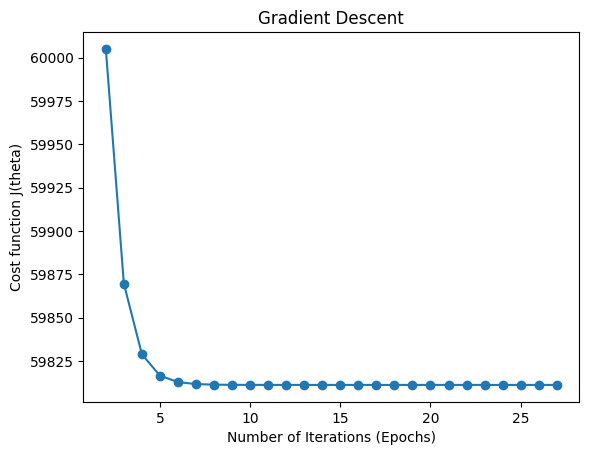

In [ ]:
cost_vals = [val[0,0] for val in cost]
plt.plot(range(2, len(cost_vals)+1),cost_vals[1:], marker='o')
plt.xlabel("Number of Iterations (Epochs)")
plt.ylabel("Cost function J(theta)")
plt.title("Gradient Descent")
plt.show()